# <a id='100'><font color='blue'>Time series analysis of energy related ETFs and stocks </a>

# <font color='red'>Table of Content:
# <font color='green'>- <a href='#1'>1. Price over Time: Oil, Natural gas, Lithium and Tesla</a>
# <font color='green'>- <a href='#2'>2. Moving averages</a>
# <font color='green'>- <a href='#3'>3. Average daily returns</a>
# <font color='green'>- <a href='#4'>4. Correlation of closing prices</a>
# <font color='green'>- <a href='#5'>5. Investing Risks</a>
# <font color='green'>- <a href='#6'>6. Predicting closing prices</a>
# <font color='green'>- <a href='#7'>7. ARIMA and Others</a>

# <a id='1'> 1. Price over Time: Oil, Natural gas, Lithium and Tesla</a>

In [3]:
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install -q yfinance

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# Fetching most up-to-date data: Oil, Natural gas, Lithium and Tesla

In [3]:
# The tech stocks we'll use for this analysis
#tech_list = ['TSLA', 'LIT', 'OIL', 'BOIL']

# Set up End and Start times for data grab
tech_list = ['TSLA', 'LIT', 'OIL', 'BOIL']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [ ]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [4]:
company_list = [TSLA, LIT, OIL, BOIL]
company_name = ['TSLA', 'LIT', 'OIL', 'BOIL']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-14,41.360001,41.520000,36.180000,37.889999,37.889999,6948300,BOIL
2022-11-15,36.160000,38.840000,35.330002,38.650002,38.650002,6698500,BOIL
2022-11-16,35.270000,40.500000,34.650002,40.119999,40.119999,9871300,BOIL
2022-11-17,42.230000,43.880001,40.220001,42.110001,42.110001,6018200,BOIL
2022-11-18,38.369999,42.919998,38.299999,41.970001,41.970001,5286600,BOIL
2022-11-21,44.889999,48.419998,44.630001,46.939999,46.939999,5848100,BOIL
2022-11-22,46.270000,52.119999,45.360001,51.500000,51.500000,7950500,BOIL
2022-11-23,59.290001,59.450001,52.669998,54.599998,54.599998,9677300,BOIL
2022-11-25,52.299999,54.950001,50.439999,50.689999,50.689999,4126600,BOIL


In [5]:
# Summary Stats
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,281.419233,288.197685,273.370952,280.479749,280.479749,8.076869e+07
std,51.104729,51.672392,49.781274,50.657630,50.657630,2.147746e+07
min,168.630005,170.919998,166.190002,167.869995,167.869995,4.073370e+07
25%,237.974171,245.890831,233.317497,238.242500,238.242500,6.568088e+07
50%,286.178329,292.341675,277.551666,286.476669,286.476669,7.872555e+07
75%,311.666656,317.440002,302.915833,310.714157,310.714157,9.314689e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,1.515657e+08


In [7]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-29 to 2022-11-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


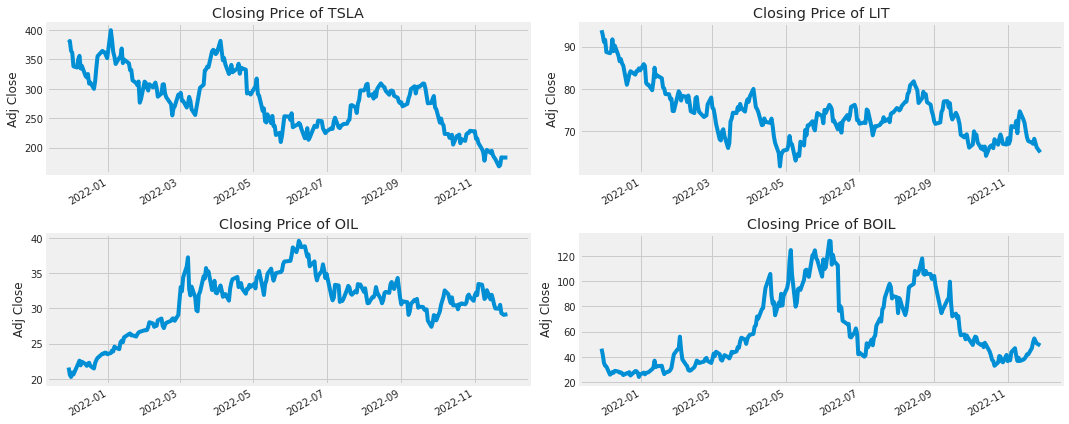

In [8]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

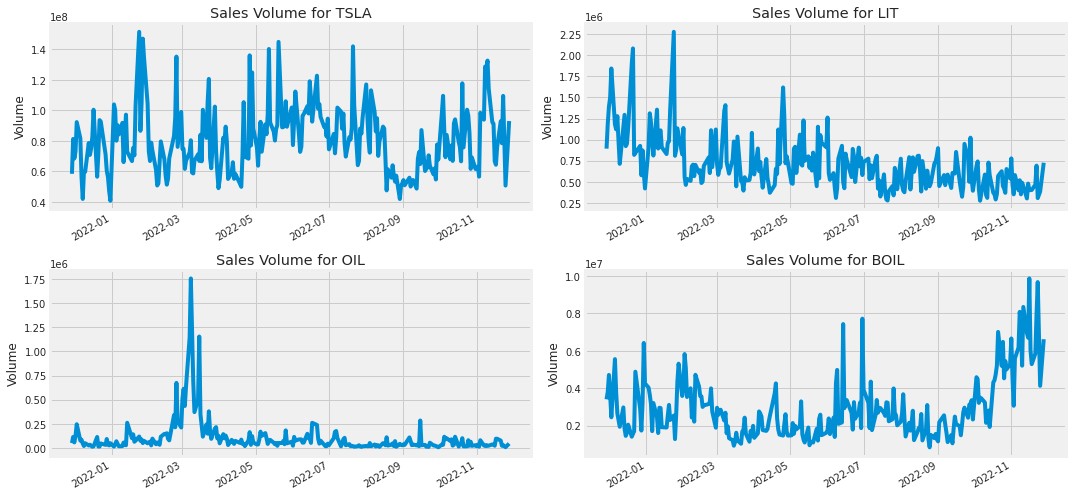

In [9]:
# Now let's plot the total volume of stock being traded each day


plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# <a id='2'> 2. Moving averages</a>

<a href='#100'> Back to top</a>

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [11]:
print(TSLA.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

In [ ]:
# df.groupby("company_name").hist(figsize=(12, 12));

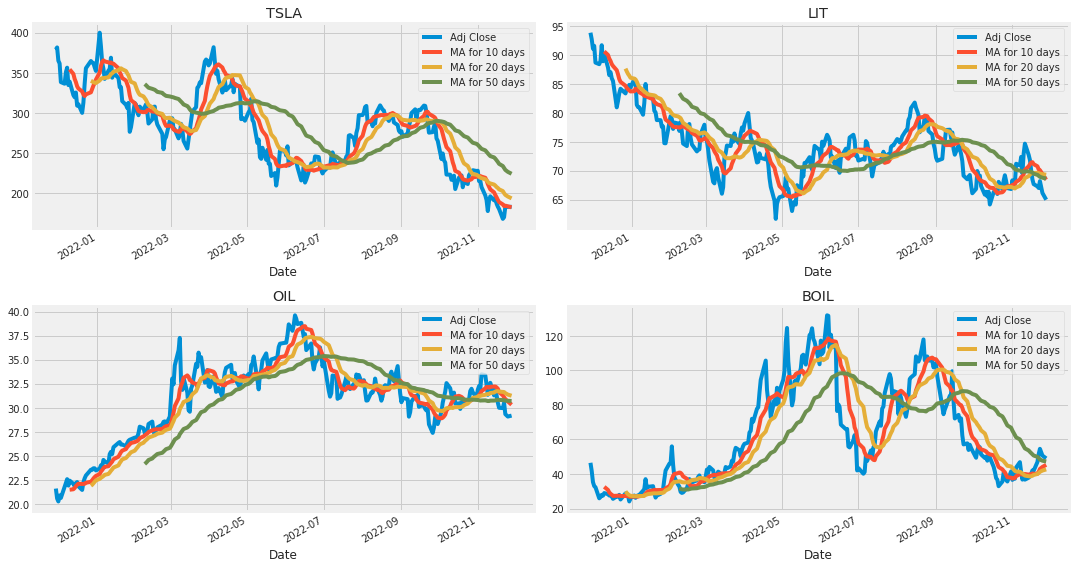

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TSLA')

LIT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('LIT')

OIL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('OIL')

BOIL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BOIL')

fig.tight_layout()

# <a id='3'> 3. Average daily returns

<a href='#100'> Back to top</a>

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

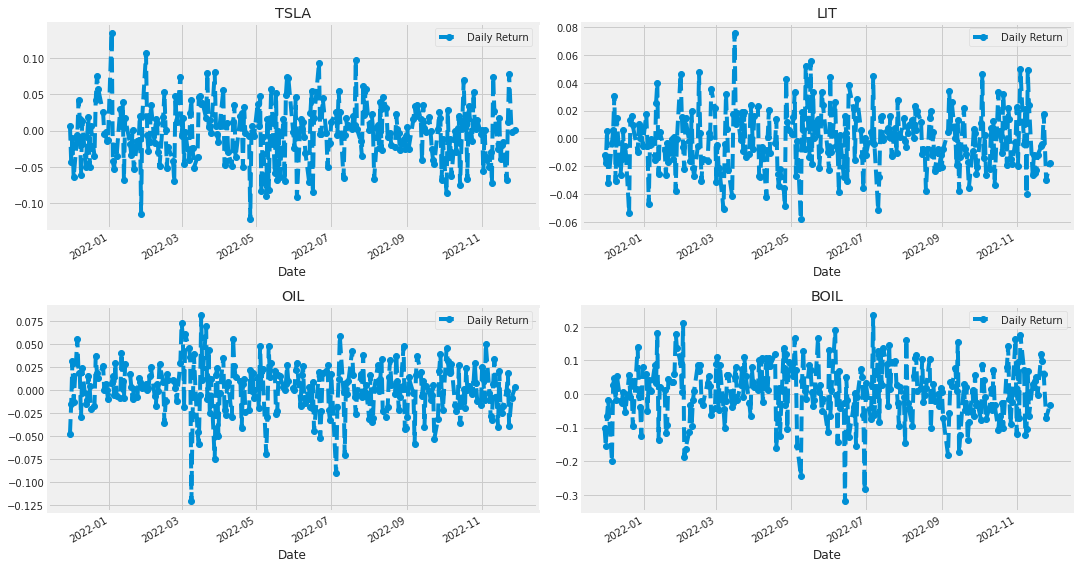

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TSLA')

LIT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('LIT')

OIL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('OIL')

BOIL['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BOIL')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

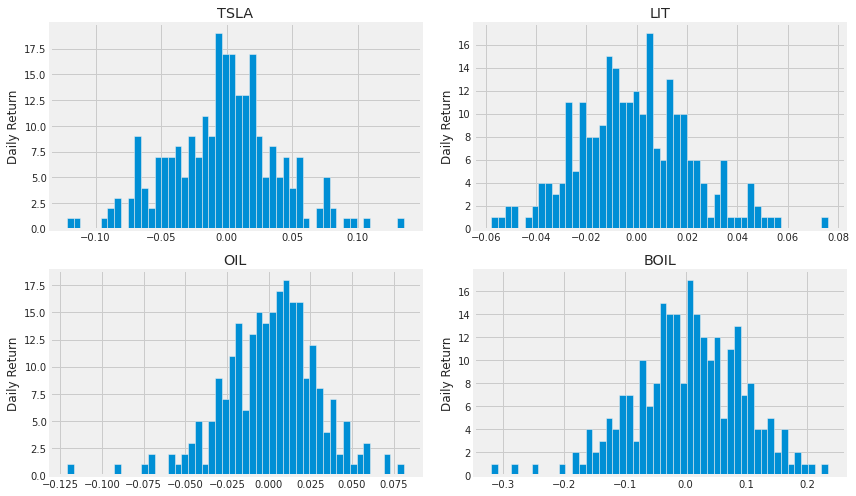

In [14]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# <a id='4'>4. Correlation between closing prices

<a id='3'>

<a href='#100'> Back to top</a>

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,TSLA,LIT,OIL,BOIL
Date,,,,
2021-11-29,378.996674,93.877739,21.590000,46.520000
2021-11-30,381.586670,92.750641,20.559999,41.799999
2021-12-01,365.000000,91.104889,20.250000,35.360001
2021-12-02,361.533325,91.603600,20.879999,33.040001
2021-12-03,338.323334,88.701096,20.610001,32.419998


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [43]:
# Make a new tech returns DataFrame
percentage_change = closing_df.pct_change()
percentage_change.head()

Symbols,TSLA,LIT,OIL,BOIL
Date,,,,
2021-11-29,NaN,NaN,NaN,NaN
2021-11-30,0.006834,-0.012006,-0.047707,-0.101462
2021-12-01,-0.043468,-0.017744,-0.015078,-0.154067
2021-12-02,-0.009498,0.005474,0.031111,-0.065611
2021-12-03,-0.064199,-0.031685,-0.012931,-0.018765


# TSLA vs OIL

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

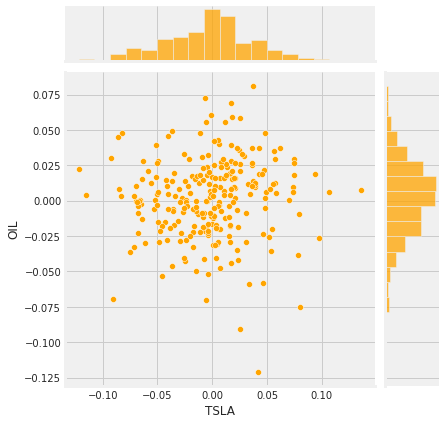

In [47]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='TSLA', y='OIL', data=percentage_change, kind='scatter', color='orange')

# TSLA vs LIT

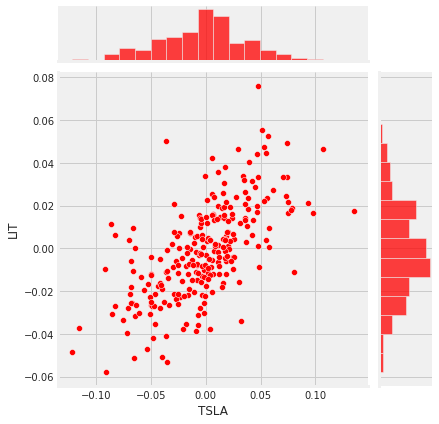

In [57]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='TSLA', y='LIT', data=percentage_change, kind='scatter',color='red')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

# percentage_change

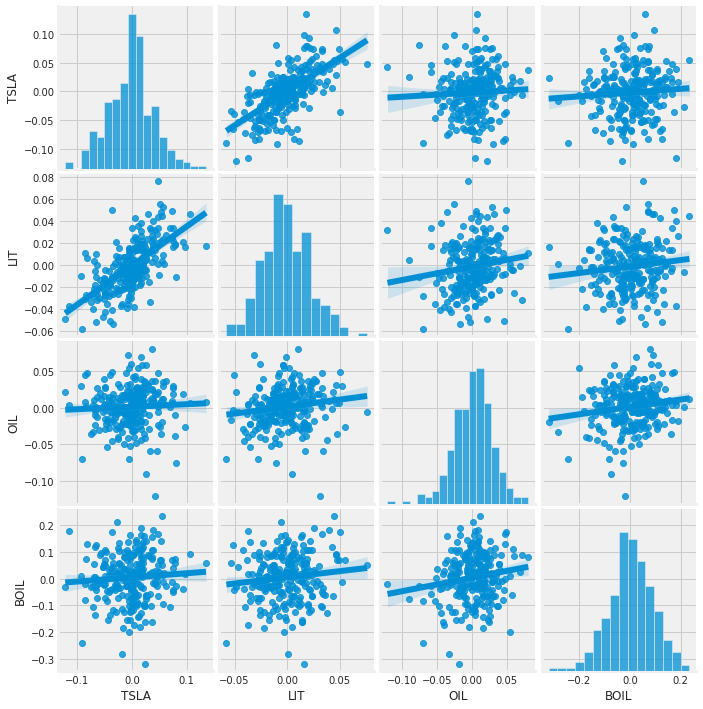

In [54]:
sns.pairplot(percentage_change, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

# percentage_change 2

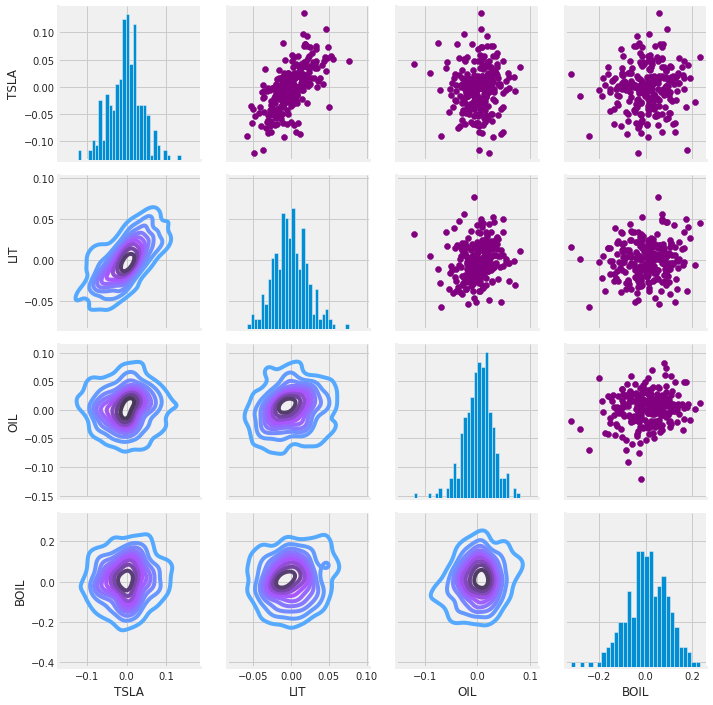

In [55]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(percentage_change.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

# Closing Prices

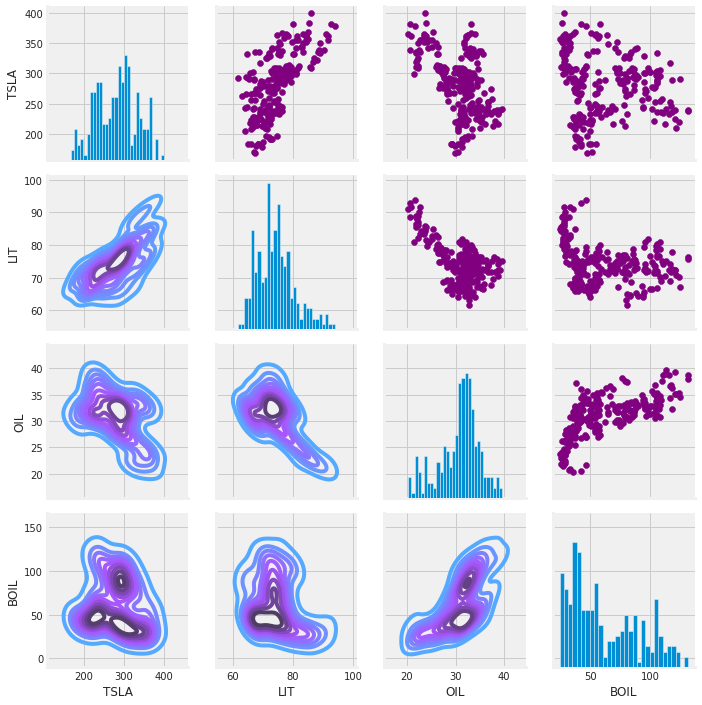

In [56]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

# Heatmap by percentage_change

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

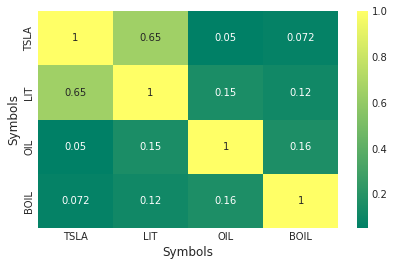

In [58]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(percentage_change.corr(), annot=True, cmap='summer')

# Heatmap by closing prices

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

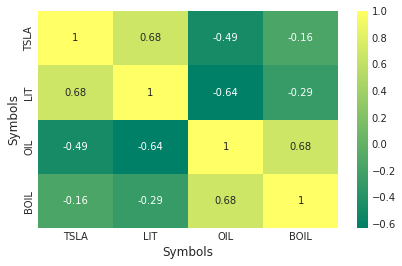

In [59]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# <a id='5'>5. Investing Risks

<a href='#100'> Back to top</a>

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

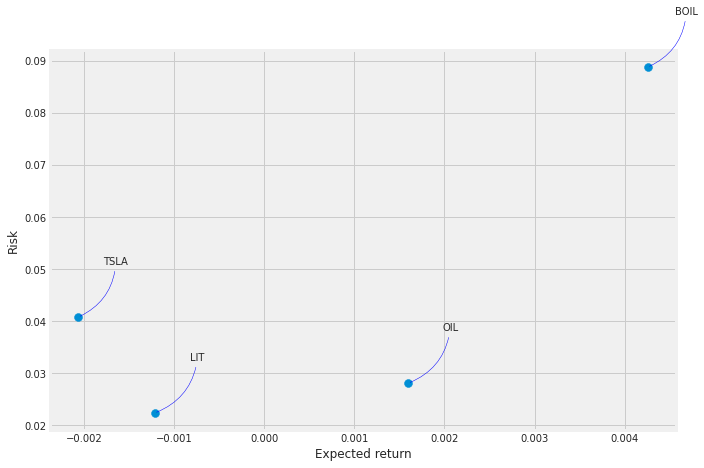

In [60]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
returns = percentage_change.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# <a id='6'>6. Predicting closing prices from history

<a href='#100'> Back to top</a>

# Fetch data from 2012

In [8]:
# Get the stock quote
df = DataReader('TSLA', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500.0,28.684000
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500.0,29.534000
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000.0,30.102667
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500.0,31.270666
2020-01-08,33.232666,31.215334,31.580000,32.809334,467164500.0,32.809334
...,...,...,...,...,...,...
2022-11-21,176.770004,167.539993,175.850006,167.869995,92882700.0,167.869995
2022-11-22,170.919998,166.190002,168.630005,169.910004,78452300.0,169.910004
2022-11-23,183.619995,172.500000,173.570007,183.199997,109536700.0,183.199997


# Plotting historic prices

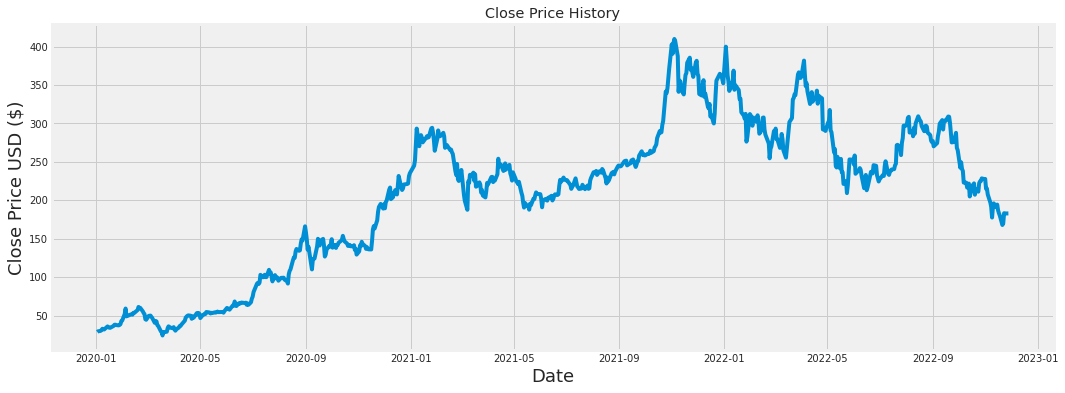

In [9]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Taking 95% data as training set

In [10]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

697

# MinMaxScaler

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01192745],
       [0.01413016],
       [0.01560381],
       [0.01863059],
       [0.02261792],
       [0.0207521 ],
       [0.02020099],
       [0.02827067],
       [0.03052694],
       [0.02717191],
       [0.02630638],
       [0.02578982],
       [0.03213016],
       [0.03599312],
       [0.0364492 ],
       [0.03517422],
       [0.03399944],
       [0.03553356],
       [0.03796777],
       [0.04830237],
       [0.04998851],
       [0.07234902],
       [0.09084485],
       [0.06452293],
       [0.06698651],
       [0.06683275],
       [0.07084254],
       [0.0713781 ],
       [0.07015323],
       [0.07649529],
       [0.07580943],
       [0.08589351],
       [0.09608989],
       [0.09297846],
       [0.09325315],
       [0.08164185],
       [0.07578869],
       [0.0721417 ],
       [0.05490012],
       [0.05299801],
       [0.06606397],
       [0.06639048],
       [0.0670798 ],
       [0.06276767],
       [0.05912932],
       [0.04263406],
       [0.04908324],
       [0.047

In [12]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01192745, 0.01413016, 0.01560381, 0.01863059, 0.02261792,
       0.0207521 , 0.02020099, 0.02827067, 0.03052694, 0.02717191,
       0.02630638, 0.02578982, 0.03213016, 0.03599312, 0.0364492 ,
       0.03517422, 0.03399944, 0.03553356, 0.03796777, 0.04830237,
       0.04998851, 0.07234902, 0.09084485, 0.06452293, 0.06698651,
       0.06683275, 0.07084254, 0.0713781 , 0.07015323, 0.07649529,
       0.07580943, 0.08589351, 0.09608989, 0.09297846, 0.09325315,
       0.08164185, 0.07578869, 0.0721417 , 0.05490012, 0.05299801,
       0.06606397, 0.06639048, 0.0670798 , 0.06276767, 0.05912932,
       0.04263406, 0.04908324, 0.04716559, 0.03443653, 0.03202997,
       0.01448604, 0.01191708, 0.        , 0.01147481, 0.01145581,
       0.01262368, 0.02483964, 0.03075671, 0.02884079, 0.02645669])]
[0.02434381153066688]

[array([0.01192745, 0.01413016, 0.01560381, 0.01863059, 0.02261792,
       0.0207521 , 0.02020099, 0.02827067, 0.03052694, 0.02717191,
       0.02630638, 0.02578982, 0.03

# LSTM

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-11-29 04:52:05.920753: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-29 04:52:06.623141: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


637/637 [==============================] - 28s 39ms/step - loss: 0.0051


In [20]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18.07270233566293

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


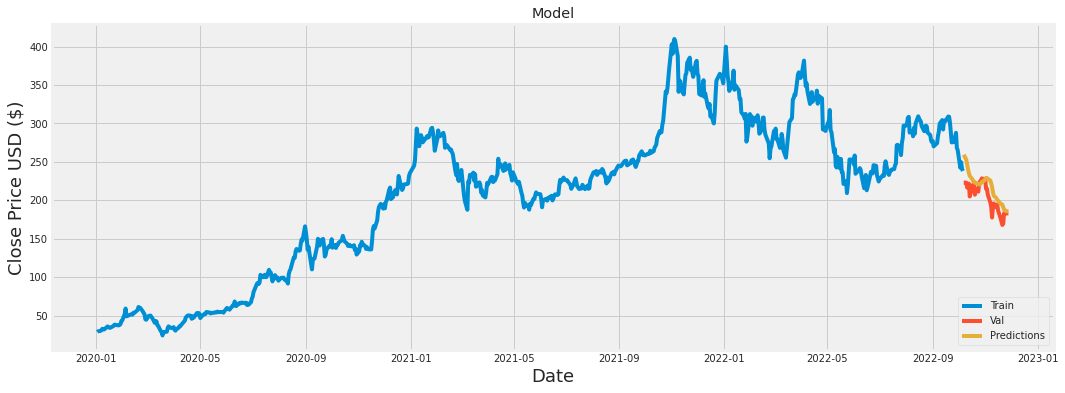

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-05-13,256.529999,274.954010
2022-05-16,241.456665,269.718079
2022-05-17,253.869995,264.835663
2022-05-18,236.603333,263.155396
2022-05-19,236.473328,260.336792
...,...,...
2022-11-21,167.869995,200.723434
2022-11-22,169.910004,196.397339
2022-11-23,183.199997,192.106415


# Double Neurons of LSTM Layers

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2548/2548 [==============================] - 236s 91ms/step - loss: 0.0036


In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

34.53195893685925

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


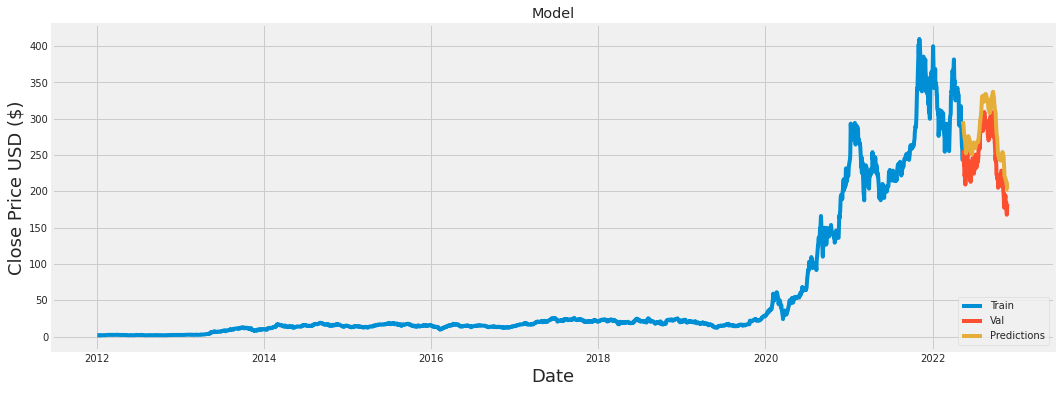

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Other optimizer: sqd, rmsprop

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2548/2548 [==============================] - 126s 48ms/step - loss: 0.0023


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

27.316944065765153

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


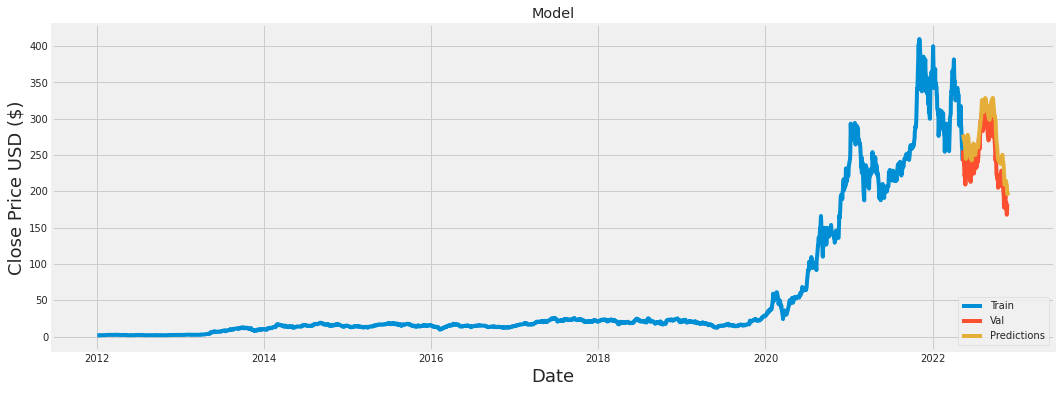

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Tuning batch and epoch

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

Epoch 1/2
1274/1274 [==============================] - 75s 56ms/step - loss: 0.0014
Epoch 2/2
1274/1274 [==============================] - 72s 56ms/step - loss: 7.1316e-04


In [41]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

13.764609805836068

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


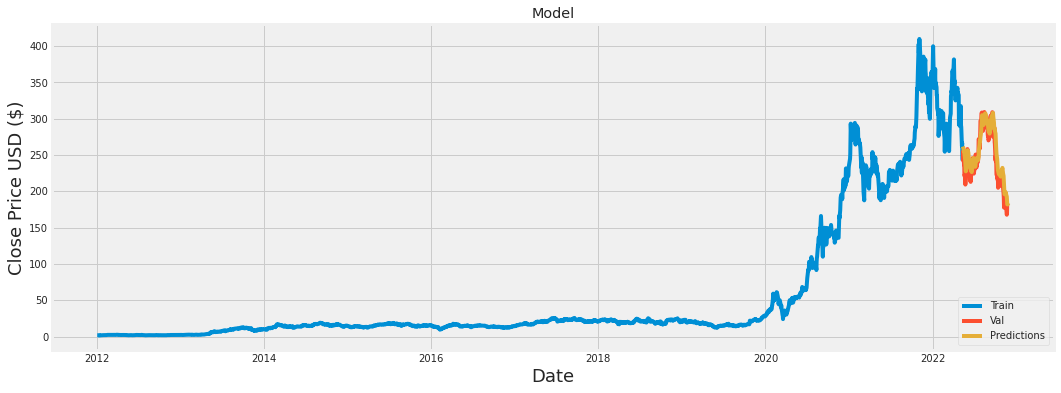

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

[https://www.kaggle.com/code/carlolepelaars/introduction-to-financial-mathematics](http://)

[https://www.kaggle.com/code/davidchilders/financial-risk-management/notebook](http://)

[https://www.kaggle.com/code/piperomeror/quantitative-risk-management](http://)

# Fetch data from 2012 or 2020

In [ ]:
df = DataReader('TSLA', data_source='yahoo', start='2020-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)



In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# <a id='7'>7. ARIMA and Others

<a href='#100'> Back to top</a>

In [22]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

model = sm.tsa.SARIMAX(x_train,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())


ValueError: SARIMAX models require univariate `endog`. Got shape (637, 60).

In [ ]:
predicted_result = result.predict(start=0, end=637)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(x_train, predicted_result))
print("The root mean squared error is {}.".format(rmse))

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Closing prices')
plt.show()

# XGB

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [29]:
_ = x_test \
    .rename(columns={'closing_price': 'TEST SET'}) \
    .join(x_train.rename(columns={'closing_price': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='closing_price', style='.')

AttributeError: 'numpy.ndarray' object has no attribute 'rename'

https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

add Codeadd Markdown
Time Series Analysis
add Codeadd Markdown
https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series https://www.kaggle.com/code/jakejhc/time-serials/edit/run/112173265

https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

add Codeadd Markdown https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series

add Codeadd Markdown LSTM:

https://www.kaggle.com/code/dimitreoliveira/deep-learning-for-time-series-forecasting https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

XGboost: https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost

Prophet: https://www.kaggle.com/code/robikscube/time-series-forecasting-with-prophet

Delhi: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/code

Basics:

https://www.kaggle.com/code/jagangupta/time-series-basics-exploring-traditional-ts https://www.kaggle.com/code/rohanrao/a-modern-time-series-tutorial https://www.kaggle.com/code/iamleonie/intro-to-time-series-forecasting

FE/https://www.kaggle.com/code/anshuls235/time-series-forecasting-eda-fe-modelling

add Codeadd Markdown